# GSTools: The Python toolbox for your geo-statistical project!

<p align="center">
<img src="https://raw.githubusercontent.com/GeoStat-Framework/GSTools/master/docs/source/pics/gstools.png" alt="GSTools-LOGO" width="251px"/>
</p>

##  Sebastian Müller, Lennart Schüler, Alraune Zech, Sabine Attinger and Falk Heße
*To navigate through the presentation, use the arrows in the lower right corner or your arrow-keys (*__*right*__ *-> next section;* __*down*__ *-> go through current section)*

## Motivation

Geo-scientific model development is lacking comprehensive open source tools, that are providing state-of-the art geo-statistic methods. To bridge this gap, we developed a geo-statistical toolbox named GSTools, which is a Python package providing an abundance of methods in a modern object oriented approach. 

## Purpose

GeoStatTools provides geostatistical tools for various purposes:
- random field generation
- conditioned field generation
- incompressible random vector field generation
- simple and ordinary kriging
- variogram estimation and fitting
- many readily provided and even user-defined covariance models
- plotting and exporting routines

## Content

In the following, we will show a handful of tutorials to demonstrate the capabilites described above.

<img
align="left"
width="300" 
src="https://raw.githubusercontent.com/GeoStat-Framework/GSTools/master/docs/source/pics/demonstrator.png" 
alt=""/>

- Tutorial 1: Random Field Generation
- Tutorial 2: The Covariance Model
- Tutorial 3: Variogram Estimation
- Tutorial 4: Kriging
- Tutorial 5: Conditioned Fields
- Tutorial 6: Field transformations


In [8]:
import warnings
warnings.filterwarnings('ignore')

# Tutorial 1: Random Field Generation

The main feature of GSTools is the spatial random field generator [`SRF`](https://geostat-framework.readthedocs.io/projects/gstools/en/stable/field.html#gstools.field.SRF), which can generate random fields following a given covariance model. The generator provides a lot of nice features, which will be explained in the following

GSTools generates spatial random fields with a given covariance model or semi-variogram. This is done by using the so-called randomization method. The spatial random field is represented by a stochastic Fourier integral and its discretised modes are evaluated at random frequencies.

GSTools supports arbitrary and non-isotropic covariance models.

## A Very Simple Example

We are going to start with a very simple example of a spatial random field with an isotropic Gaussian covariance model and following parameters:

- variance $\sigma^2=1$
- correlation length $\lambda=10$

First, we set things up and create the axes for the field. We are going to need the SRF class for the actual generation of the spatial random field. But SRF also needs a covariance model and we will simply take the Gaussian model.

In [9]:
import gstools as gs

x = y = range(100)

Now we create the covariance model with the parameters $\sigma^2$ and $\lambda$ and hand it over to SRF. By specifying a seed, we make sure to create reproducible results:

In [10]:
model = gs.Gaussian(dim=2, var=1, len_scale=10)
srf = gs.SRF(model, seed=20170519)

With these simple steps, everything is ready to create our first random field. We will create the field on a structured grid (as you might have guessed from the x and y), which makes it easier to plot.

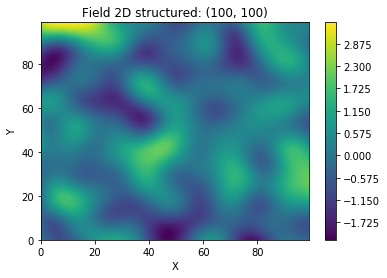

In [11]:
field = srf.structured([x, y])
srf.plot()

## Creating Fancier Fields

Only using Gaussian covariance fields gets boring. Now we are going to create much rougher random fields by using an exponential covariance model and we are going to make them anisotropic.

The code is very similar to the previous examples, but with a different covariance model class Exponential. As model parameters we a using following

- variance $\sigma^2=1$
- correlation lengths $\lambda=(12, 3)$
- rotation angle $\theta=\pi/8$


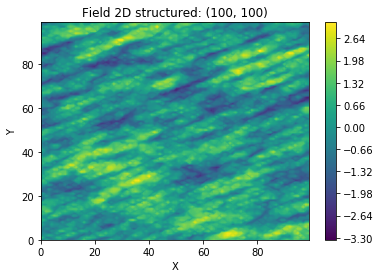

In [12]:
import numpy as np
x = y = np.arange(100)
model = gs.Exponential(dim=2, var=1, len_scale=[12.0, 3.0], angles=np.pi / 8)
srf = gs.SRF(model, seed=20170519)
srf.structured([x, y])
srf.plot()

## Final words

Plans for the future.